Definition of first steps to create a machine learning model

Split the df in two, one numerical, one categorical
numerical: bmi and sleep_hours
Drop any ID column if there is one
Round values if needed for clarity
Get the correlation matrix for the numerical variables
Plot two graphs for numerical -> barplot for sleep hours and histogram for bmi (check first the amount of nunique) if above 36 then histogram
This is done to get an idea of how the data looks like and if there will be skewness -> even better we could plot the histogram that shares the box plot
Categoricals: Definitely plot the using the function def count_plot_sorted(df: pd.DataFrame, optional_arg = 6) -> None Check the cardinality for the categorical columns -> if high, group
Numericals: BMI is continuous, depending of its skewness, apply outliers removal
concat: concat_df = pd.concat([continuous_clean_df, discrete_df, categorical], axis=1)
concat_df.dropna(inplace=True, ignore_index=True) if needed
Answers Yes or No, transform in 1 or 0
Reduce class imbalance in by grouping, if needed (loses detail, but reduce imbalance) Usually when it is only two values (yes or no, fem or masc) and a cat nom situation. transform into 1 and 0 For the column general health, which it is a cat ord: check the unique values, group if necessary Example: ordinal_vehicle = {'Large': 3, 'Medsize': 2, 'Small': 1} concat_df['vehicle_size'] = concat_df['vehicle_size'].replace(ordinal_vehicle)


Which are the 3 most common health conditions that women affected by heart disease suffer from?
Maybe Tableau?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_cleaned = pd.read_csv('~/Desktop/data_analytics/Week_5/Mid_bootcamp_project/mid_bootcamp_project/data/cleaned/heart_data.csv', sep = ';')

In [3]:
ml_model_data = ['had_heart_attack', 'had_angina', 'had_stroke', 'had_asthma', 'had_skin_cancer', 'had_copd', 'had_depressive_disorder','had_kidney_disease', 'had_arthritis', 'had_diabetes', 'covid_tested_positive']
ml_model = data_cleaned[ml_model_data].copy()

#
# bmi numerical -> binning underweight, overweight, health 0, 1 2 or 1 2 3 cell 4
# chi2 contigency cell 5

In [4]:
def change_binary(df: pd.DataFrame) -> pd.DataFrame:
    '''
    This function changes the column value to a numerical one based on the type of value.
    Input: the df: pd.DataFrame and the column to be changed in this df 
    Output: pd.DataFrame with the changed column. 
    '''
    for column in df.columns:
        df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else 0)
    return df #cell 6 not to bmi 

In [5]:
change_binary(ml_model)

,had_heart_attack,had_angina,had_stroke,had_asthma,had_skin_cancer,had_copd,had_depressive_disorder,had_kidney_disease,had_arthritis,had_diabetes,covid_tested_positive
0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,1,0,1,0,1
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
127806,0,0,0,0,0,0,0,0,0,0,0
127807,0,0,0,0,0,0,0,0,0,0,0
127808,0,0,0,0,0,0,0,0,0,0,0
127809,0,0,0,0,0,0,1,0,0,0,1


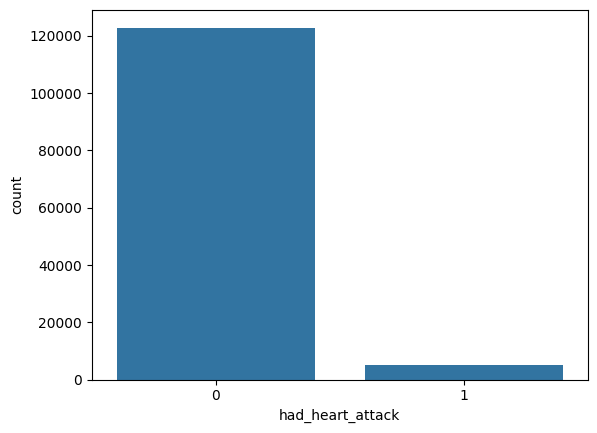

In [15]:
sns.countplot(x = 'had_heart_attack', data = ml_model); # imbalanced distribution 
plt.show()

In [6]:
y = ml_model['had_heart_attack']
X = ml_model.drop(['had_heart_attack'], axis = 1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
X_train

In [8]:
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder() 
encoder.fit(X_train)

#path = "./"
#filename = "one_hot_encoder.pkl"
#with open(path+filename, "wb") as file:
#    pickle.dump(encoder, file)

X_train_np = encoder.transform(X_train).toarray()
X_test_np  = encoder.transform(X_test).toarray()

X_train_encoded_df = pd.DataFrame(X_train_np, columns = encoder.get_feature_names_out(), index = X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_np,  columns = encoder.get_feature_names_out(), index = X_test.index)
X_train_encoded_df.head()

,had_angina_0,had_angina_1,had_stroke_0,had_stroke_1,had_asthma_0,had_asthma_1,had_skin_cancer_0,had_skin_cancer_1,had_copd_0,had_copd_1,had_depressive_disorder_0,had_depressive_disorder_1,had_kidney_disease_0,had_kidney_disease_1,had_arthritis_0,had_arthritis_1,had_diabetes_0,had_diabetes_1,covid_tested_positive_0,covid_tested_positive_1
93323,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
122926,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
31740,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
100438,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
120811,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [14]:
X_train_encoded_df.shape

(102248, 20)

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 69)
lr.fit(X_train_encoded_df, y_train)


print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_encoded_df, y_test)))
y_train_pred = lr.predict(X_train_encoded_df)
y_test_pred = lr.predict(X_test_encoded_df )

The accuracy of the model in the TEST set is: 0.96


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))

The accuracy in the TEST set is: 0.96
The precision in the TEST set is: 0.47
The recall in the TEST set is: 0.13
The F1 in the TEST set is: 0.20
The Kappa in the TEST set is: 0.18


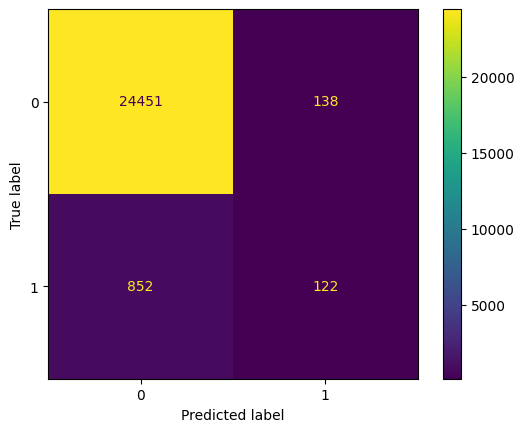

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [13]:
import shap

explainer = shap.Explainer(lr)

# Calculate SHAP values for a subset of the test set
shap_values = explainer.shap_values(y_test_pred)

# Visualize the summary plot
shap.summary_plot(shap_values, y_test_pred, feature_names = X_test_encoded_df.columns)


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: LogisticRegression(random_state=69)

In [ ]:
import shap

# Assuming X_train_encoded_df is your training data and X_test_encoded_df is your test data
# Use the SHAP explainer without specifying the algorithm
explainer = shap.Explainer(lr)

# Calculate SHAP values for the training set
shap_values_train = explainer.shap_values(X_train_encoded_df)

# Calculate SHAP values for the test set
shap_values_test = explainer.shap_values(X_test_encoded_df)

# Visualize the summary plot for the test set
shap.summary_plot(shap_values_test, X_test_encoded_df, feature_names=X_train_encoded_df.columns)


In [ ]:
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming you already have a trained logistic regression model 'lr'
# You don't need to retrain it, just use it directly
lr = LogisticRegression(multi_class='multinomial', random_state=69, solver='saga')
lr.fit(X_train_encoded_df, y_train)

# Split the data for creating a surrogate model
X_train_surrogate, X_valid_surrogate, y_train_surrogate, y_valid_surrogate = train_test_split(
    X_train_encoded_df, y_train, test_size=0.2, random_state=42
)

# Train a Decision Tree classifier as a surrogate model
surrogate_model = DecisionTreeClassifier(random_state=42)
surrogate_model.fit(X_train_surrogate, y_train_surrogate)

# Use the SHAP explainer with the surrogate model
explainer = shap.Explainer(surrogate_model)

# Calculate SHAP values for the test set
shap_values_test = explainer.shap_values(X_test_encoded_df)

# Visualize the summary plot for the test set
shap.summary_plot(shap_values_test, X_test_encoded_df, feature_names=X_train_encoded_df.columns)


In [ ]:
def hist_out_plot(df: pd.DataFrame, column: str) -> None:
    '''
    This function plots two types of graphs for the same column, in a way one can compare them: one can see
    the quartiles, means, and outliers due to their shared x-axis. 
    Input: pd.DataFrame
    Output: Boxplot and histogram for each column. 
    '''

    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=column, ax=ax_box)
    sns.histplot(data=df, x=column, ax=ax_hist)
    plt.show()


In [ ]:
hist_out_plot(data_cleaned, "bmi")

In [ ]:
data_cleaned['bmi'].skew()

In [ ]:
def log_transform_clean(x):
    
    x = np.log10(x)
    if ( x > 0 ):
        return x

data_cleaned['bmi'] = list(map(log_transform_clean, data_cleaned['bmi']))
sns.displot(data_cleaned['bmi'])
plt.show()

In [ ]:
data_cleaned['bmi'].skew()

In [ ]:
bmi_mean = data_cleaned.groupby(['had_heart_attack'])['bmi'].mean()
bmi_mean

In [ ]:
# Ho: there are no relationship/differences
# Ha: there are relationship/differences

# p_value < alpha -> Reject H0 // alpha = 0.05
# ecig and heart attack are related

In [ ]:
# We are considering the BMI values (we did a log trans. because even the outliers are important) and the had_heart_attack
# which can be "Yes" or "No" -- I know mean of the BMI value should be the one used in terms of ttest1samp, but I am
# using the log value of 25 (because BMI > 25 is above the "healthy" BMI) - my hypothesis is that when is above 25,
# you're more likely to have had answer yes for a heart attack.


# alpha of 0.05 (p-value threshold)
# One sided test - left:
# Null hypothesis or H0: bmi ≥ 1.4
# Alternative hyp or H1: bmi < 1.4


had_heart_attack_yes = 'Yes'
bmi_heart = data_cleaned[data_cleaned['had_heart_attack'].apply(lambda x: had_heart_attack_yes in x)]
bmi_heart_yes = bmi_heart.loc[:, 'bmi']

In [ ]:
from scipy.stats import ttest_1samp
stat, pval = ttest_1samp(bmi_heart_yes, popmean = 1.4, alternative = "less")
stat, pval

In [ ]:
log_transform_clean(25)

In [ ]:
# p_value is bigger than 𝛼 = 0.05 so we accept the null hypothesis. 

In [ ]:
log_transform_clean(18.5)

In [ ]:
# But also when your BMI is too low, your chances of having a heart attack increase, so I did this: 

# alpha of 0.05 (p-value threshold)
# One sided test - left:
# Null hypothesis or H0: bmi ≤ 1.27
# Alternative hyp or H1: bmi > 1.27

In [ ]:
stat, pval = ttest_1samp(bmi_heart_yes, popmean = 1.27, alternative = "greater")
stat, pval

In [ ]:
# p_value is smaller than  𝛼 = 0.05
# Therefore we reject the null hypothesis
# which says that in the case of THIS dataset, having a lower BMI is not related to heart attack.


In [ ]:
ecig_heart = pd.crosstab(data_cleaned['e_cigarette_usage'], data_cleaned['had_heart_attack'])
ecig_heart

In [ ]:
import scipy.stats as st

In [ ]:
st.chi2_contingency(ecig_heart)

def train_models(models_list:list, X_train: np.ndarray, y_train: np.ndarray) -> list:
    '''
    This function trains different models at the same time
    Input: A list of the models to train, the X_train and the y_train
    Output: A list of trained models 
    '''
    
    trained_models = []
    
    for model in models_list: 
        model.fit(X_train, y_train)
        trained_models.append(model)
    return trained_models

from sklearn.neighbors import KNeighborsRegressor

lr = LogisticRegression()


models = [ln, knn]
trained_models = train_models(models, X_train_new_scaled_df, y_train)

y_train_pred_lr = lr.predict(X_train_new_scaled_df)
y_test_pred_lr  = lr.predict(X_test_new_scaled_df)

y_train_pred_knn = knn.predict(X_train_new_scaled_df)
y_test_pred_knn  = knn.predict(X_test_new_scaled_df)
